Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

Read the female respondent file.

In [1]:
%matplotlib inline

import chap01soln
resp = chap01soln.ReadFemResp()

Make a PMF of <tt>numkdhh</tt>, the number of children under 18 in the respondent's household.

In [82]:
import thinkstats2
import thinkplot

pmf = thinkstats2.Pmf(resp.numkdhh)
pmf

Pmf({0: 0.46617820227659301, 1: 0.21405207379301322, 2: 0.19625801386889966, 3: 0.087138558157791451, 4: 0.025644380478869556, 5: 0.010728771424833181})

The above result tells us that the majority of the respondents in this dataset, about 46.6% of them, do not have any children under 18 in their household. This probably means that these respondents are having their first baby as it is unlikely that a respondent would have a second baby after their previous one has reached an age above 18.

Display the PMF.

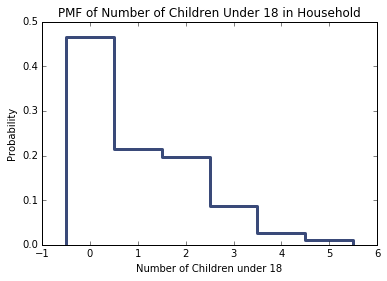

In [83]:
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Number of Children under 18', ylabel='Probability', 
                 title='PMF of Number of Children Under 18 in Household')
thinkplot.show()

The PMF shows that again, most of the respondents have 0 children under 18 in their household. It actually kind of looks like the probability exponentially decays as the number of children under 18 increases.

Define <tt>BiasPmf</tt>.

In [84]:
def BiasPmf(pmf, label=''):
    """Returns the Pmf with oversampling proportional to value.

    If pmf is the distribution of true values, the result is the
    distribution that would be seen if values are oversampled in
    proportion to their values; for example, if you ask students
    how big their classes are, large classes are oversampled in
    proportion to their size.

    Args:
      pmf: Pmf object.
      label: string label for the new Pmf.

     Returns:
       Pmf object
    """
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

Make a the biased Pmf of children in the household, as observed if you surveyed the children instead of the respondents.

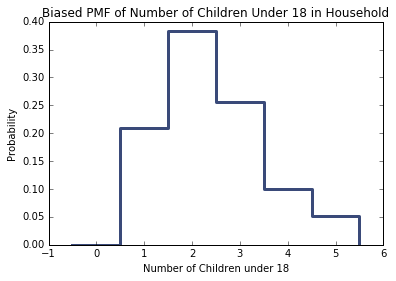

In [85]:
biasedPmf = BiasPmf(pmf)
thinkplot.Pmf(biasedPmf)
thinkplot.Config(xlabel='Number of Children under 18', ylabel='Probability', 
                 title='Biased PMF of Number of Children Under 18 in Household')
thinkplot.show()

So if you are a child and you are being asked how many children under 18 live in this household, the highest percentage of respondent's children would say around 2, the next highest being 3 and then 1.

Display the actual Pmf and the biased Pmf on the same axes.

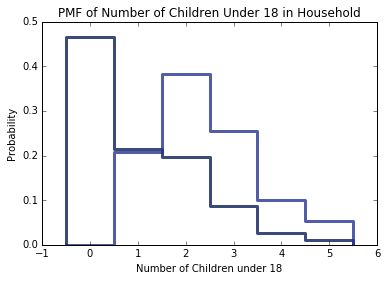

In [86]:
thinkplot.Pmfs([pmf, biasedPmf])
thinkplot.Config(xlabel='Number of Children under 18', ylabel='Probability', 
                 title='PMF of Number of Children Under 18 in Household')
thinkplot.show()

I am having some trouble figuring out how to do legends in thinkplot but the darker blue line is the actual PMF and the lighter blue purple line is the biased, observed PMF.

Compute the means of the two Pmfs.

In [21]:
print "Mean of actual Pmf", pmf.Mean()
print "Mean of biased Pmf", biasedPmf.Mean()

Mean of actual Pmf 1.02420515504
Mean of biased Pmf 2.40367910066


This is a pretty large and significant difference in the mean between the biased and the actual pmfs. I guess this means that if you ask the respondents with children under 18 in their household, the children will on average observe 2.4 children (including themselves) in the household. But the actual number of children under 18 in the household is only about 1.

### ThinkStats Chapter 3, Exercise 3

I started with the question, “Are first babies more likely to be late?” To address it, I computed the difference in means between groups of babies, but I ignored the possibility that there might be a difference between first babies and others for the same woman.

To address this version of the question, select respondents who have at least two babies and compute pairwise differences. Does this formulation of the question yield a different result?

Hint: use nsfg.MakePregMap.

In [55]:
import nsfg

df = nsfg.ReadFemPreg()
pregMap = nsfg.MakePregMap(df)
res = []
for key in pregMap:
    babies = pregMap[key]
    if len(babies) >= 2:
        res.append(df.iloc[babies[0]].prglngth - df.iloc[babies[1]].prglngth)

So nsfg.MakePregMap returns a dictionary where the keys are all respondents and the values are lists where each element is an index to a recorded pregnancy in the dataset. I loop through all of the respondents and I check if they have had 2 or more children. If they have, I find their first pregnancy (which is the first index in the list) and their second pregnancy (the second index in the list) and I subtract those. That means that a positive value in res, which stores all of the differences, means that the first baby came later than the second baby and a negative value means the first baby came before the second baby.

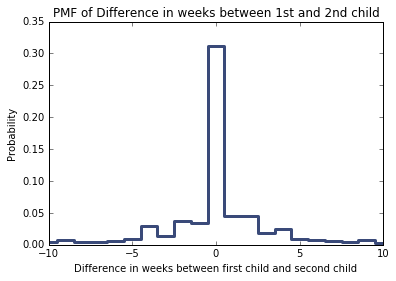

In [87]:
pmf = thinkstats2.Pmf(res)
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Difference in weeks between first child and second child', ylabel='Probability', 
                 title='PMF of Difference in weeks between 1st and 2nd child',
                 axis=[-10, 10, 0, 0.35])
thinkplot.show()

If I don't restrict the axes in the plot above, the plot fans out to values of +/- 40 which doesn't make sense to me so I restrict the x-axis which is the difference in weeks to +/- 10 weeks since I think it is a reasonable assumption that babies come within 10 weeks of each other, regardless of birth order. We see that primarily, there is no real difference between the first and second baby pregnancy lengths but there is a slightly higher probability that a first baby will be born around 1-3 weeks later than the second baby.

My approach here could definitely be improved. One reason that I think the plot fans out to +/- 40 would be if prglngth is 0 which probably encodes something or should be cleaned to represent the median.

### Clarifying Questions

Use this space to ask questions regarding the content covered in the reading. These questions should be restricted to helping you better understand the material. For questions that push beyond what is in the reading, use the next answer field. If you don't have a fully formed question, but are generally having a difficult time with a topic, you can indicate that here as well.

### Enrichment Questions

Use this space to ask any questions that go beyond (but are related to) the material presented in this reading. Perhaps there is a particular topic you'd like to see covered in more depth. Perhaps you'd like to know how to use a library in a way that wasn't show in the reading. One way to think about this is what additional topics would you want covered in the next class (or addressed in a followup e-mail to the class). I'm a little fuzzy on what stuff will likely go here, so we'll see how things evolve.

### Additional Resources / Explorations

If you found any useful resources, or tried some useful exercises that you'd like to report please do so here. Let us know what you did, what you learned, and how others can replicate it.